# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [ ]:
! git clone https://github.com/rvt9bx/DS3001visualization

Cloning into 'DS3001visualization'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 38 (delta 5), reused 2 (delta 2), pack-reused 27
Receiving objects: 100% (38/38), 7.30 MiB | 20.64 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [48]:
%cd '/content/DS3001visualization/'

/content/DS3001visualization


In [49]:
! pwd

/content/DS3001visualization


In [50]:
! git pull

remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 4.08 MiB | 3.34 MiB/s, done.
From https://github.com/rvt9bx/DS3001visualization
   0cea477..c3d0a25  main       -> origin/main
Updating 0cea477..c3d0a25
Fast-forward
 assignment/assignment.ipynb                                     |   1749 +-
 assignment/data/CC_R20_P08_v10_D18_WWDSE_Cond.csv               | 236125 +++++++++++++++++++++++++
 assignment/data/Specific Chronic Conditions Data Dictionary.pdf |    Bin 0 -> 97846 bytes
 3 files changed, 237752 insertions(+), 122 deletions(-)
 create mode 100644 assignment/data/CC_R20_P08_v10_D18_WWDSE_Cond.csv
 create mode 100644 assignment/data/Specific Chronic Conditions Data Dictionary.pdf


# **Q1.**
This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

# **Q2.**
This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

## PT 1

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data

adf = pd.read_csv("/content/DS3001visualization/assignment/data/airbnb_hw.csv", low_memory=False)

In [ ]:
# clean price variable

var = 'Price'

adf[var] = adf[var].str.replace(',','')  # take out commas
adf[var] = pd.to_numeric(adf[var], errors='coerce')  # coerce to numeric

## PT 2

In [ ]:
# find dimensions
adf.shape

(30478, 13)

In [ ]:
adf.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
adf.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

The dimensions of the data are 30478 by 13. Thus there are 30478 observations and 13 variables: 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', and 'Review Scores Rating'.

## PT 3

In [ ]:
# cross tab Room Type and Property Type

pd.crosstab(adf['Room Type'], adf['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


The most common property types overall are Apartments, Houses, or Lofts. There are a lot of property types that are rare rentals that only have a few observations, like Castles, Chalets, Lighthouses, etc.

Renting private rooms is more common than renting the entire property for Bed & Breakfasts, Castles, Chalets, Dorms, Houses, Huts, Tents, Treehouses, and the 'Other' category.

## PT 4

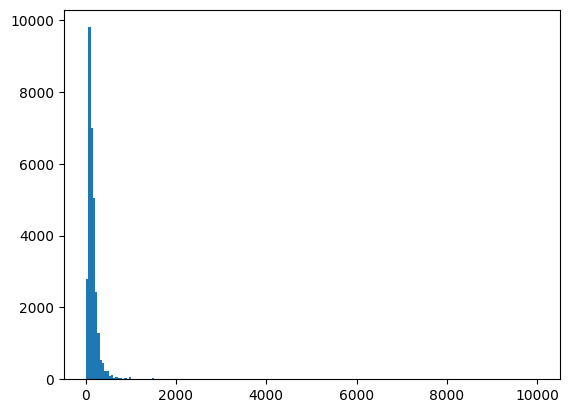

In [ ]:
# price histogram
plt.hist(adf['Price'], 200)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

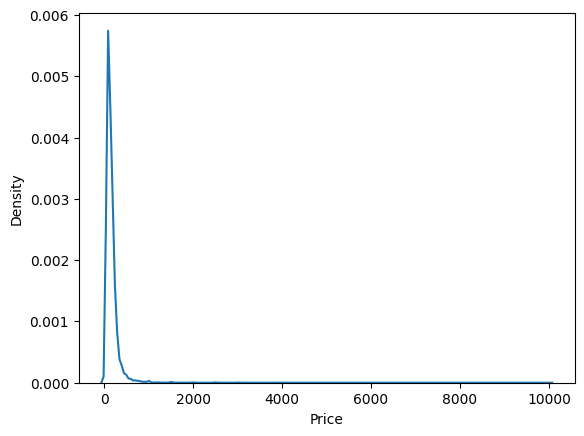

In [ ]:
# price kernel density plot
sns.kdeplot(adf['Price'])

<Axes: ylabel='Price'>

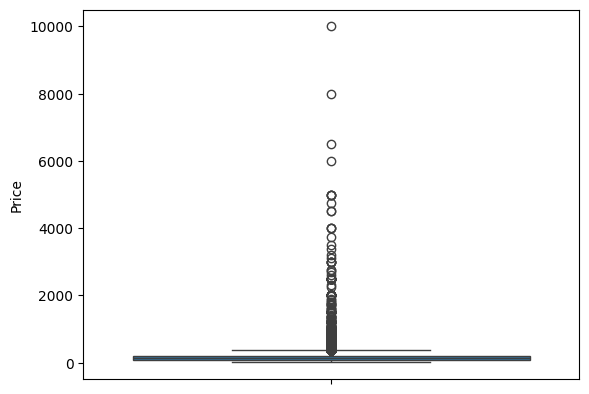

In [ ]:
# price boxplot
sns.boxplot(adf['Price'])

In [ ]:
# price statistical description
adf['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

Yes this data is badly scaled- most observations are less than 1000 dollars, and there are many outliers, with the maximum as expensive as 10,000 dollars.

In [ ]:
# new price_log variable
adf['Price_log'] = np.log(adf['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

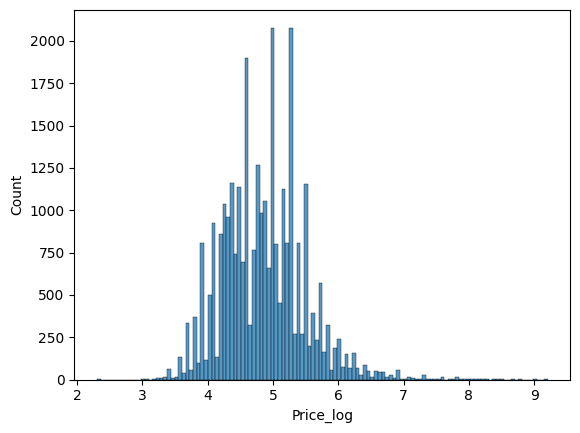

In [ ]:
# price log histogram
sns.histplot(adf['Price_log'])

<Axes: xlabel='Price_log', ylabel='Density'>

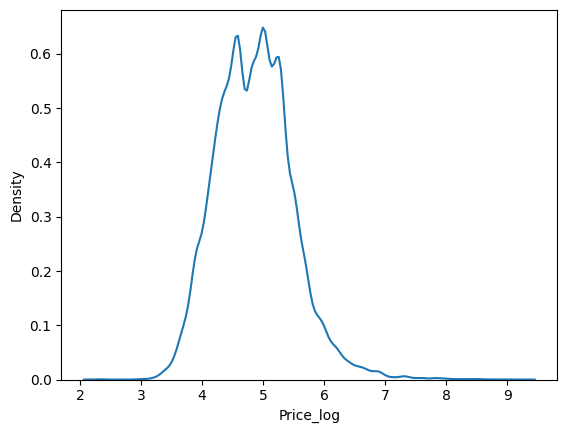

In [ ]:
# price log kernel density plot
sns.kdeplot(adf['Price_log'])

<Axes: ylabel='Price_log'>

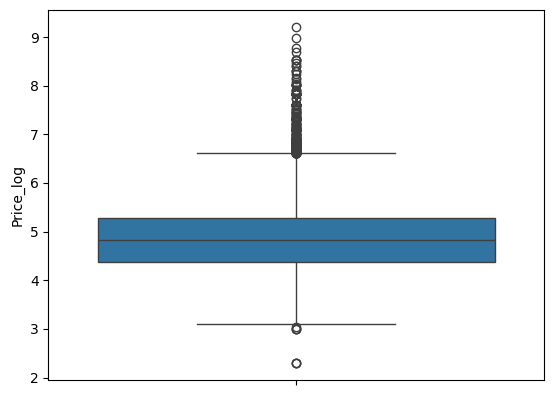

In [ ]:
# price log boxplot
sns.boxplot(adf['Price_log'])

In [ ]:
# price log statistical description
adf['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

## PT 5

<Axes: xlabel='Beds', ylabel='Price_log'>

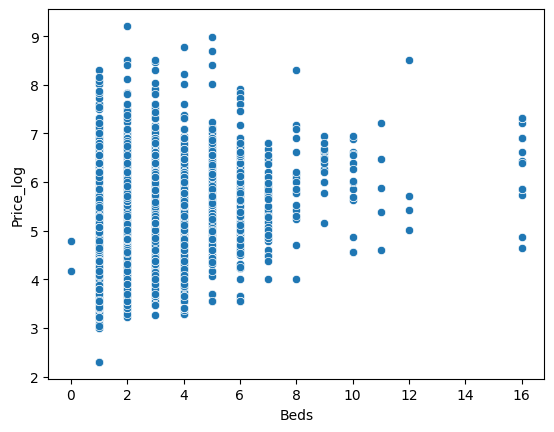

In [ ]:
# scatterplot of price_log and beds

sns.scatterplot(adf, x='Beds', y='Price_log')

Because Beds is a numeric variable but it is discrete (you can't have half a bed), the points are clustered at the integer values along the x-axis. Thus it makes it difficult to actually see how many points there are. As the number of beds increases, the value of Price_log might increase slightly but there is no clearly visible association.

In [ ]:
# description based on number of beds

adf['Price'].groupby(by=adf['Beds']).describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


The average price ranges from 92 at 0 beds to 1418 at 12 beds. One pattern that I noticed is that the average price increases as the number of beds increases from 0 to 5, and then has some fluctuations as the bed number increases to 16. A similar pattern occurs in the standard deviations. Also, most standard deviations are relatively high, greater than the means, which means that the range of price values is very spread out, which makes sense with the possible extremely expensive outlier observations.

## PT 6

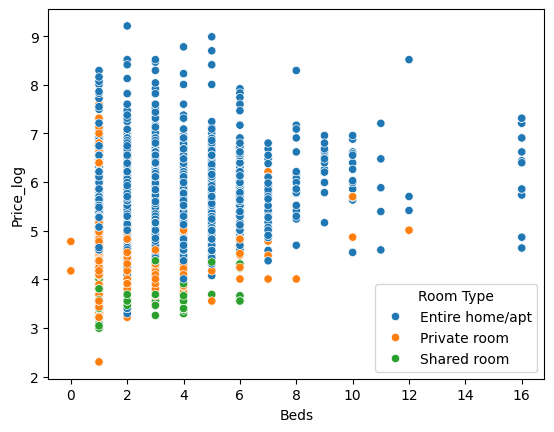

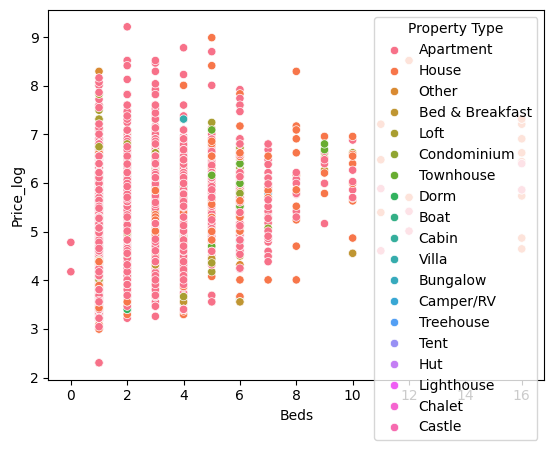

In [ ]:
# scatterplot of price log and beds with room type and property type

sns.scatterplot(adf, x='Beds', y='Price_log', hue='Room Type')
plt.show()

sns.scatterplot(adf, x='Beds', y='Price_log', hue='Property Type')
plt.show()

From the scatterplot of price vs bed number colored by room type, we can see that shared rooms tend to be the cheapest across all bed numbers, and then private rooms, and then renting the entire house / apt is most expensive across all bed numbers.

Because the Apartment property type is so overwhelming, it is difficult to see any clear patterns in the price vs beds by property type graph.

In [ ]:
# description of price based on room type and property type

adf['Price'].groupby(by=adf['Room Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,17024.0,220.796346,242.222346,10.0,135.0,175.0,240.0,10000.0
Private room,12609.0,91.919740,67.119678,10.0,65.0,80.0,100.0,3000.0
Shared room,845.0,80.514793,110.756196,10.0,45.0,60.0,85.0,2500.0


In [ ]:
adf['Price'].groupby(by=adf['Property Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,27102.0,162.045642,181.376882,10.0,85.00,130.0,195.00,10000.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,94.0,256.585106,249.357946,46.0,131.25,175.0,298.75,1990.0


On average, renting the entire house/apt has the highest price and standard deviation. As for property type, the "other" category has the highest average price and standard deviation. Because of the expensive outliers (see skewed right histogram in pt 4), the median is probably a more reliable estimate of central tendency

## PT 7

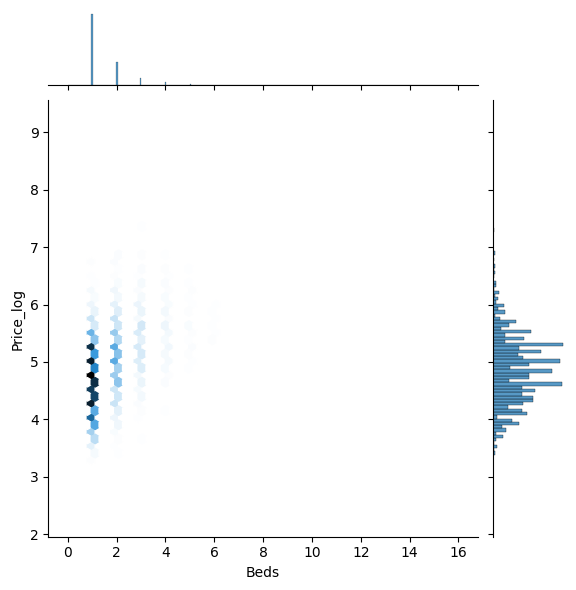

In [ ]:
# jointplot of price log and beds

sns.jointplot(adf,x='Beds',y='Price_log',kind='hex')

The data is actually mainly concentrated between 1-2 beds, with some observations having 3-5 beds. Most observations are in the 3.5 to 6 price log range. The plots in pts 5 and 6 make me think that there are more observations with higher bed numbers and price that could be important, but this plot tells me that those are actually very very rare.

# **Q3.**
Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

# **Q4.**
Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

## PT 1

https://data.cms.gov/medicare-chronic-conditions/specific-chronic-conditions

see data dictionary and csv files in assignment/data folder

Disclaimer: through my work I've discovered this is definitely a weird dataset as each row/observation is not a single beneficiary but is already aggregated according to specific parameters, but I'm already this far in and thought I might as well continue and see what I can get out of it.

## PT 2

The data dictionary does not describe how missings are handled. Based on the csv file, they seem to be just empty values. For some categorical variables, it describes a few possible categories, but it does not describe all of them. In my opinion, this data dictionary could definitely be more thorough and descriptive, because after reading it I still don't have a handle on what the data can tell me.

## PT 3

In [51]:
# import data

df = pd.read_csv("/content/DS3001visualization/assignment/data/CC_R20_P08_v10_D18_WWDSE_Cond.csv", low_memory=False)

In [64]:
# explore data
df.head()
df.shape
df.columns

# rename interesting columns for easier use
df = df.rename(columns={'Bene_Geo_Desc': 'location',
                   'Bene_Age_Lvl': 'age',
                   'Bene_Cond':'condition',
                   'Prvlnc':'prevalence',
                   'Tot_Mdcr_Stdzd_Pymt_PC':'spending_standardized',
                   'Tot_Mdcr_Pymt_PC':'spending'})

# select just my columns
my_df = df.loc[:,['location','age','condition','prevalence','spending_standardized','spending']]
my_df.shape

(236124, 6)

In [77]:
# cleaning!

# see nulls
my_df.isnull().sum() # lots of nulls in prevalence, spending_standardized, and spending
# I am leaving the nulls for now, and I will filter them out for certain analyses and visualizations

# datatypes
my_df.dtypes # categoricals are objects, numbers are floats so we are good

# location contains different categories for each county in the state, so clean up by making them all states + DC, National, Unknown, Virgin Islands, Puerto Rico
len(my_df['location'].unique()) # = 3253
my_df['general_location'] = my_df['location'].str.split(' : ').str[0]
len(my_df['general_location'].unique()) # = 55
my_df['general_location'].unique()

# check others
my_df['age'].unique()
my_df['condition'].unique() # these are clean categories!

array(['Alcohol Abuse', "Alzheimer's Disease/Dementia", 'Arthritis',
       'Asthma', 'Atrial Fibrillation', 'Autism Spectrum Disorders',
       'COPD', 'Cancer', 'Chronic Kidney Disease', 'Depression',
       'Diabetes', 'Drug/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis (Chronic Viral B & C)', 'Hyperlipidemia',
       'Hypertension', 'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia and Other Psychotic Disorders', 'Stroke'],
      dtype=object)

## PT 4

For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

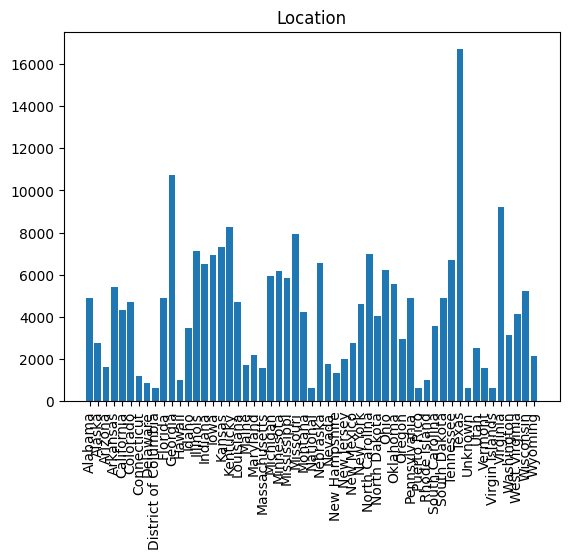

In [79]:
# location bar graph
loc_df = my_df.groupby(['general_location'],as_index=False).size()
plt.bar(loc_df['general_location'], loc_df['size'])
plt.xticks(rotation=90)
plt.title("Location")
plt.show()

Because this dataset was already aggregated data, this is basically showing us which states have more counties, hence Texas and then Georgia being the greatest.

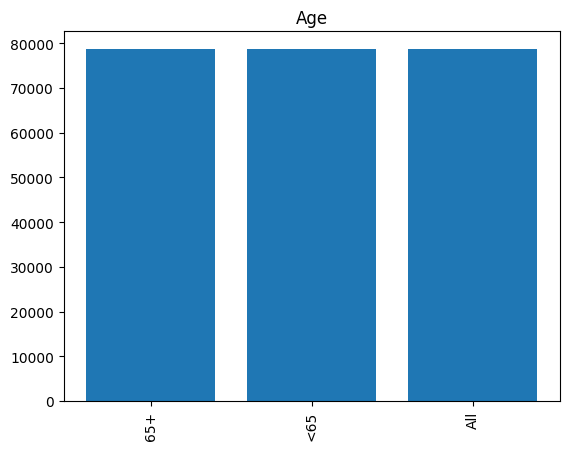

In [80]:
# age bar graph
loc_df = my_df.groupby(['age'],as_index=False).size()
plt.bar(loc_df['age'], loc_df['size'])
plt.xticks(rotation=90)
plt.title("Age")
plt.show()

Also because of the aggregate data, there is an observation for each age category for each location, etc, hence they are all equal.

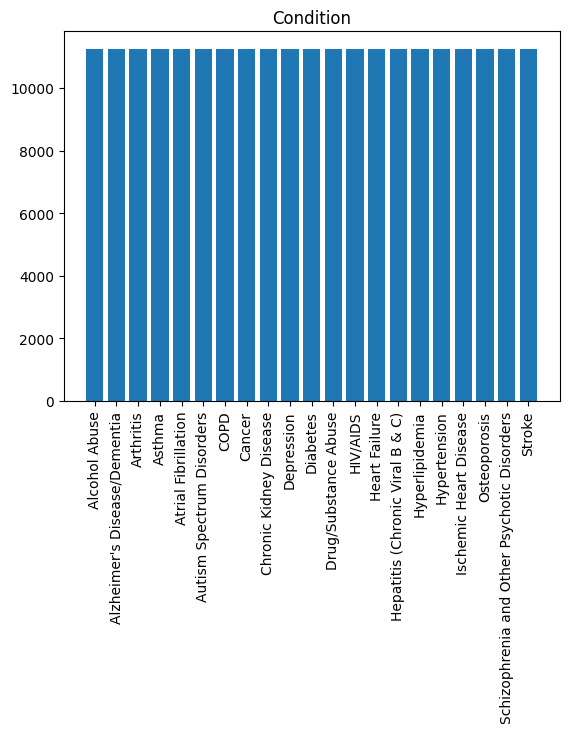

In [81]:
# condition bar graph
loc_df = my_df.groupby(['condition'],as_index=False).size()
plt.bar(loc_df['condition'], loc_df['size'])
plt.xticks(rotation=90)
plt.title("Condition")
plt.show()

The same reason as above means there are the same number of observations for each condition.

<Axes: ylabel='prevalence'>

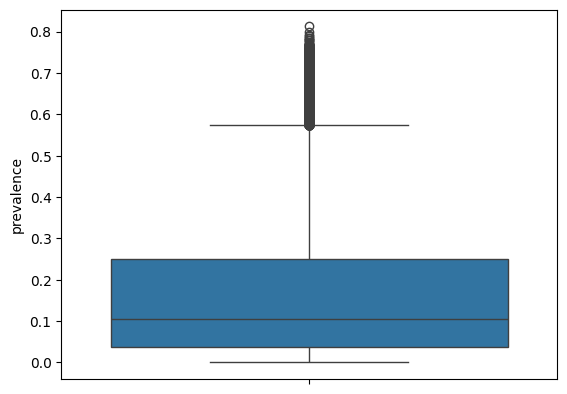

In [82]:
# prevalence boxplot
sns.boxplot(my_df['prevalence'])

<Axes: ylabel='spending_standardized'>

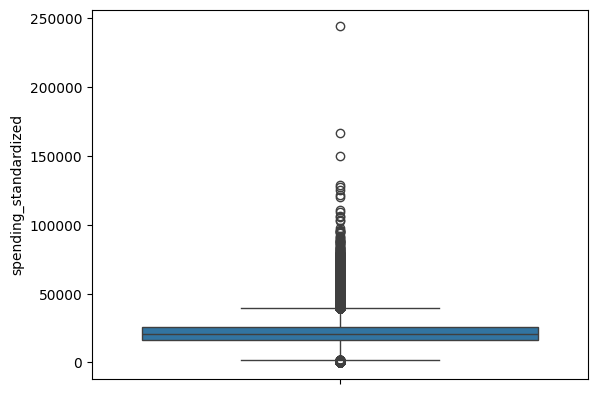

In [83]:
# spending_standardized boxplot
sns.boxplot(my_df['spending_standardized'])

<Axes: ylabel='spending'>

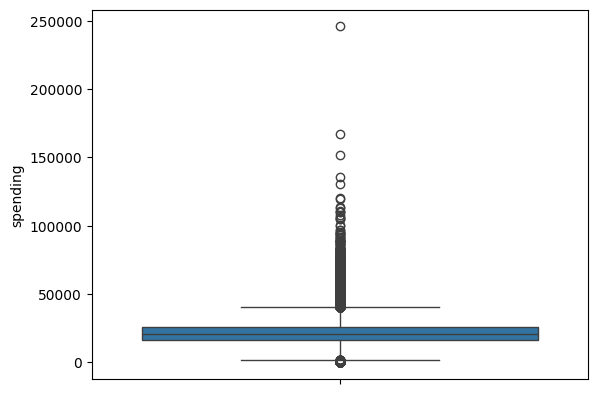

In [84]:
# spending_standardized boxplot
sns.boxplot(my_df['spending'])

There are definitely a lot of outliers in these numeric variables. Relevant note: the prevalence values are percentages.

## PT 5

<Axes: xlabel='prevalence', ylabel='Count'>

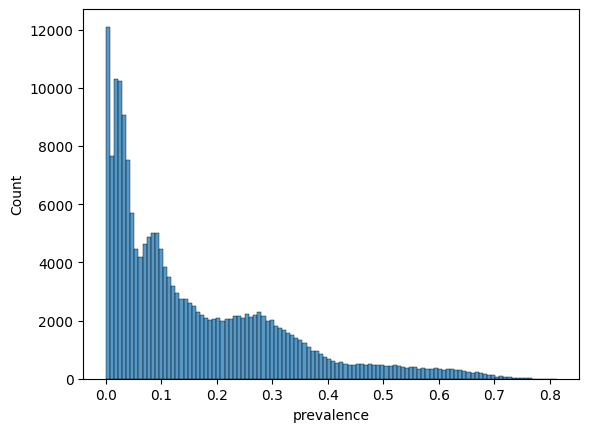

In [85]:
# prevalence histogram
sns.histplot(my_df['prevalence'])

This data is skewed, but not enough to require rescaling because there are a lot around 1% and 3%, with visible bars all the way up to about 7%.

## PT 6



<Axes: xlabel='prevalence', ylabel='spending'>

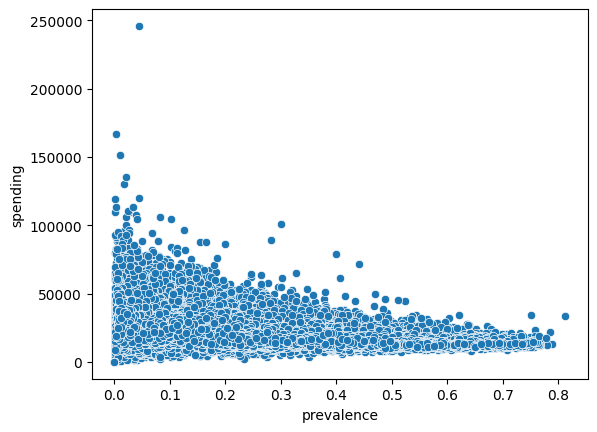

In [94]:
# scatterplot

sns.scatterplot(my_df, x='prevalence', y='spending')

The general trend from this scatterplot is that as prevalence increases, spending also decreases and evens out.

## PT 7

In [91]:
# prevalence 5 number summary per condition

my_df['prevalence'].groupby(my_df['condition']).describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Alcohol Abuse,9106.0,0.027977,0.019609,0.0,0.01410,0.0201,0.039100,0.1814
Alzheimer's Disease/Dementia,9326.0,0.088687,0.041104,0.0,0.05250,0.0946,0.114475,0.3915
Arthritis,10749.0,0.314497,0.064158,0.0,0.27320,0.3182,0.358400,0.6033
Asthma,9667.0,0.050321,0.019344,0.0,0.03680,0.0464,0.060400,0.1728
Atrial Fibrillation,8680.0,0.066444,0.032322,0.0,0.02990,0.0767,0.092100,0.1767
Autism Spectrum Disorders,4204.0,0.004323,0.007606,0.0,0.00000,0.0016,0.004000,0.1002
COPD,10358.0,0.127218,0.041036,0.0,0.09890,0.1228,0.152000,0.3230
Cancer,9017.0,0.064654,0.026861,0.0,0.03630,0.0721,0.085300,0.1478
Chronic Kidney Disease,10643.0,0.231451,0.050969,0.0,0.20000,0.2310,0.261650,0.5337


From this description, it seems like on average across the US from this data, Hypertension is the most common chronic condition and HIV/AIDS is the least common.